<a href="https://colab.research.google.com/github/bansalsahab/MLSA/blob/main/Q2(decision%20tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# decision tree

In [2]:
dataset=pd.read_csv('data.csv')
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
# there is no correlation of name with target variable hence we can drop it
dataset.drop(['Name','Fare'],axis=1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,NaN,S,0
1,2,1,female,38.0,1,0,PC 17599,C85,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1
3,4,1,female,35.0,1,0,113803,C123,S,1
4,5,3,male,35.0,0,0,373450,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,NaN,S,0
887,888,1,female,19.0,0,0,112053,B42,S,1
888,889,3,female,NaN,1,2,W./C. 6607,NaN,S,0
889,890,1,male,26.0,0,0,111369,C148,C,1


In [7]:
dataset_encoded=pd.get_dummies(dataset, columns=['Sex'])

In [8]:
dataset_encoded['Age'] = dataset_encoded['Age'].fillna(dataset['Age'].mean())

In [9]:
dataset_encoded['Cabin']=dataset_encoded['Cabin'].fillna(0)
# dataset_encoded.head()
X=dataset_encoded.iloc[:,[1,3,4,12]].values
y=dataset_encoded.iloc[:,10]
#sex=1 for male and 0 for female

In [10]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

In [11]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [12]:
model_lr.score(X_test,y_test)

0.38414759602748416

In [13]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state = 49)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=49)

In [14]:
model_dt.score(X_test,y_test)

0.2097669743893702

In [15]:
# classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test)
print(accuracy*100)


100.0


In [17]:
clf.predict([[3,22,1,1]])

array([0])

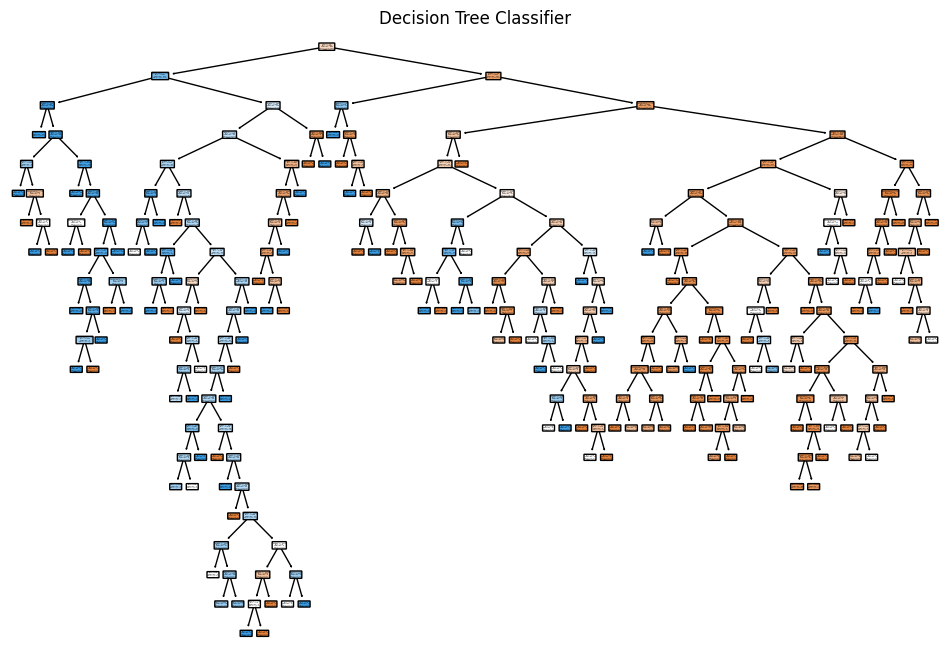

In [18]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=dataset.columns, class_names=['0','1'], filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()